# XGBoost Model

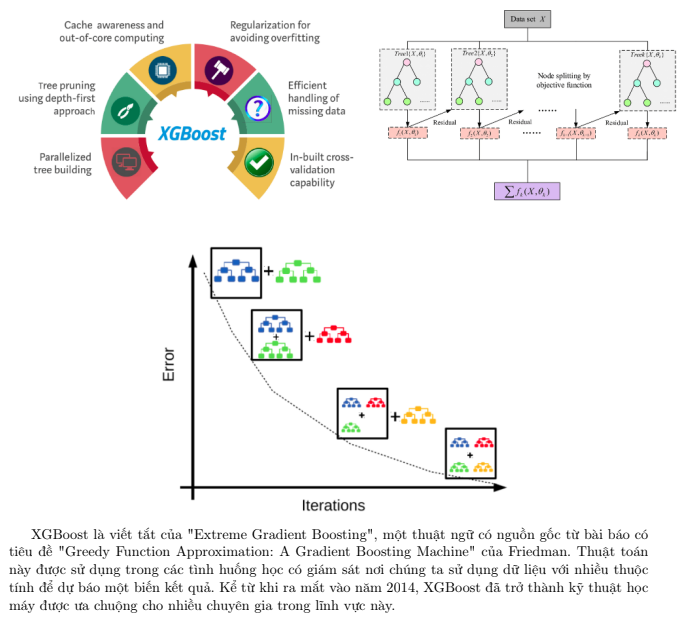
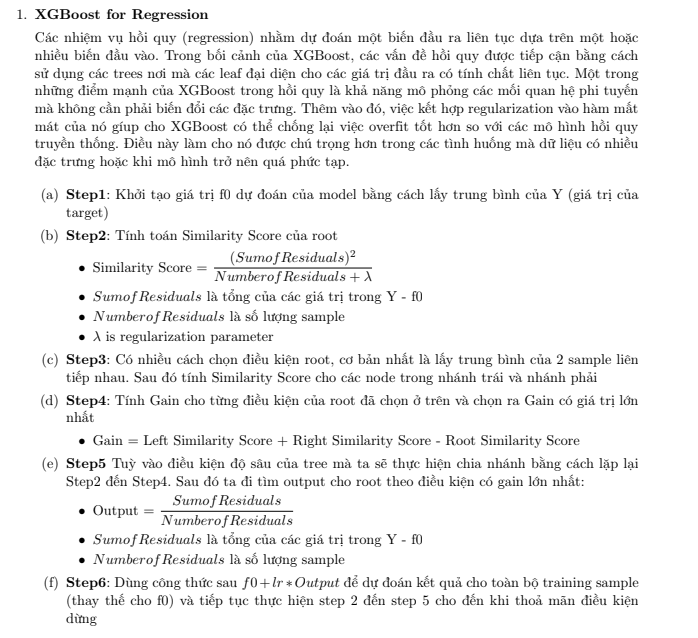
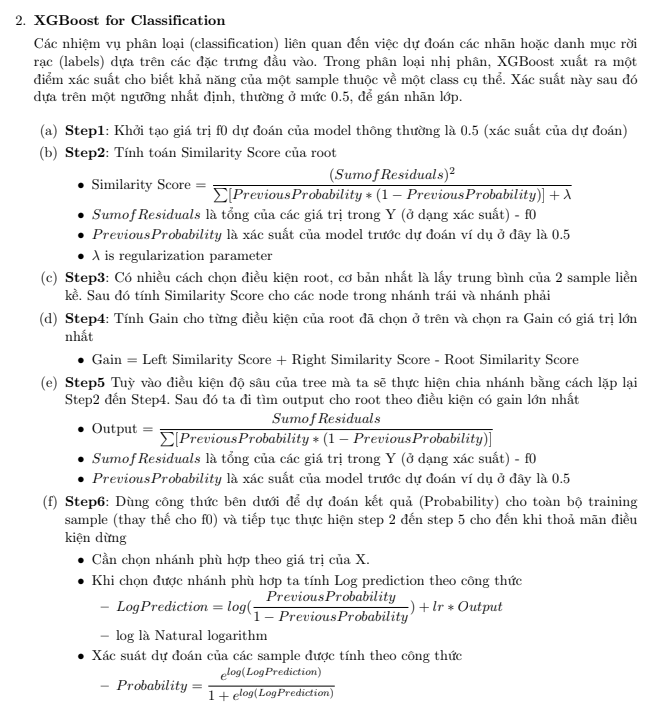

## Exercies

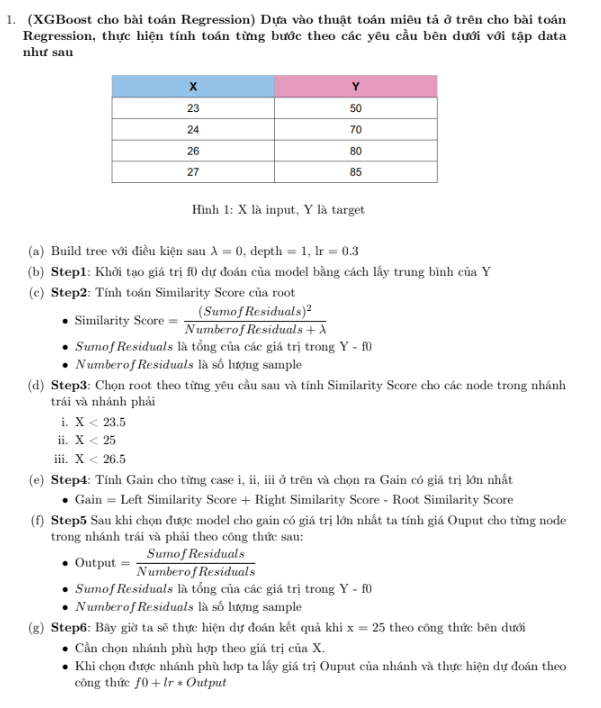
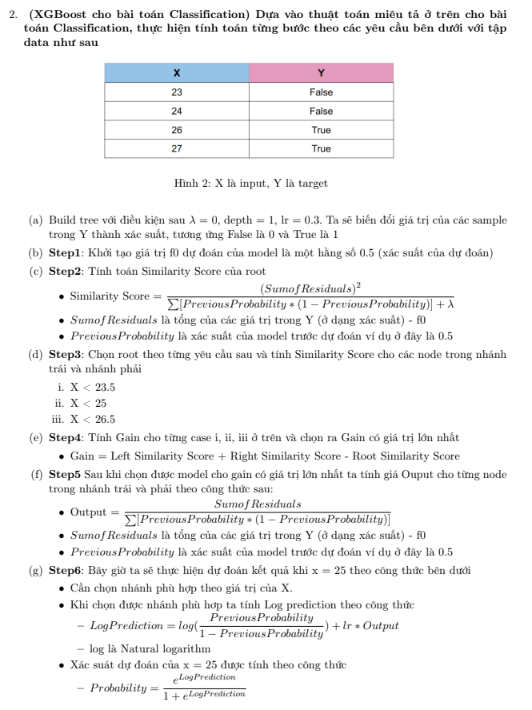
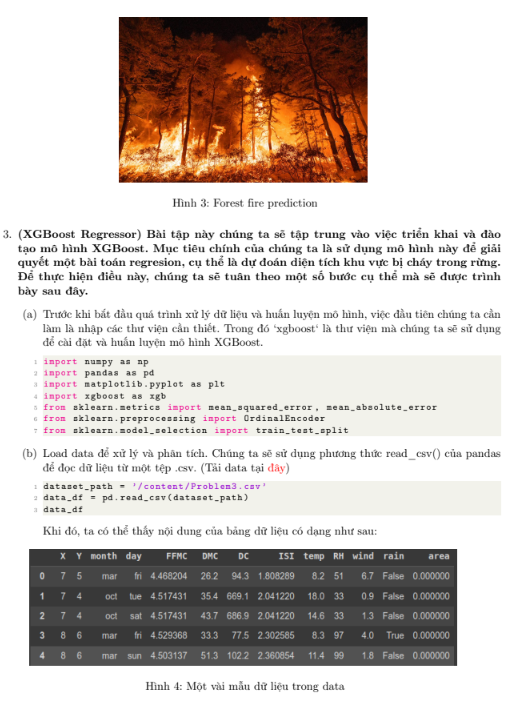
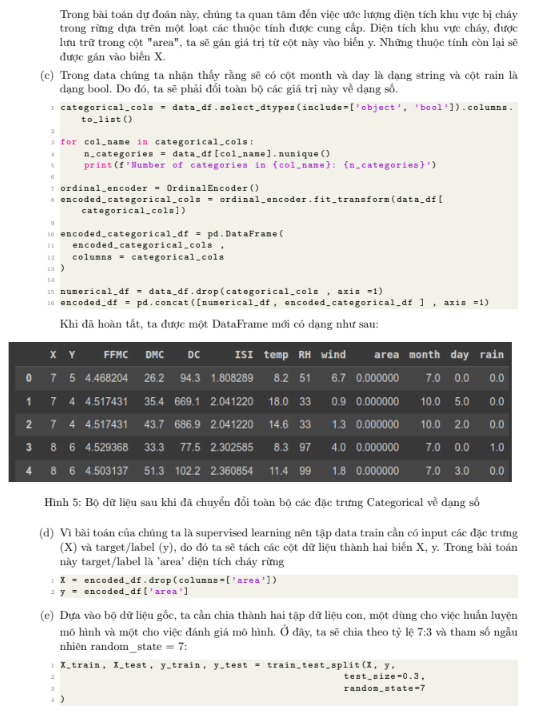
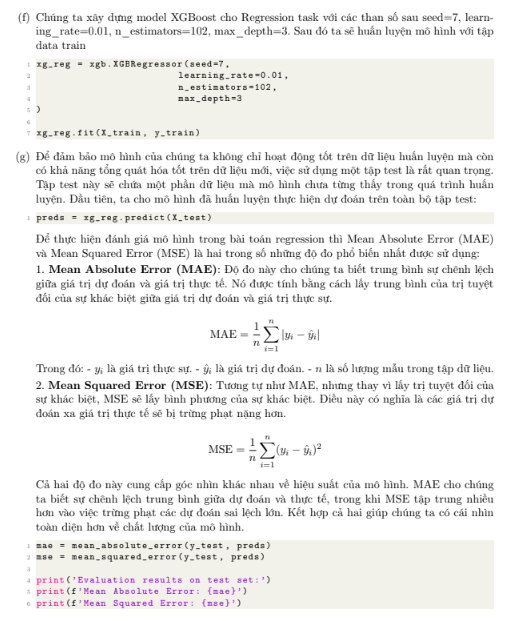
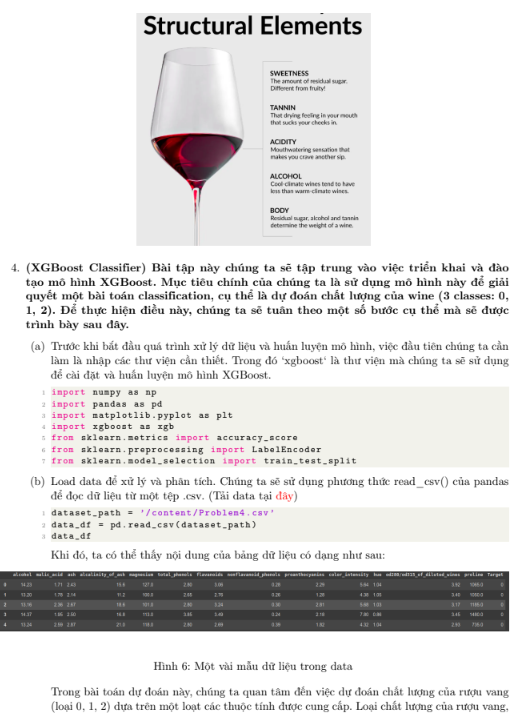
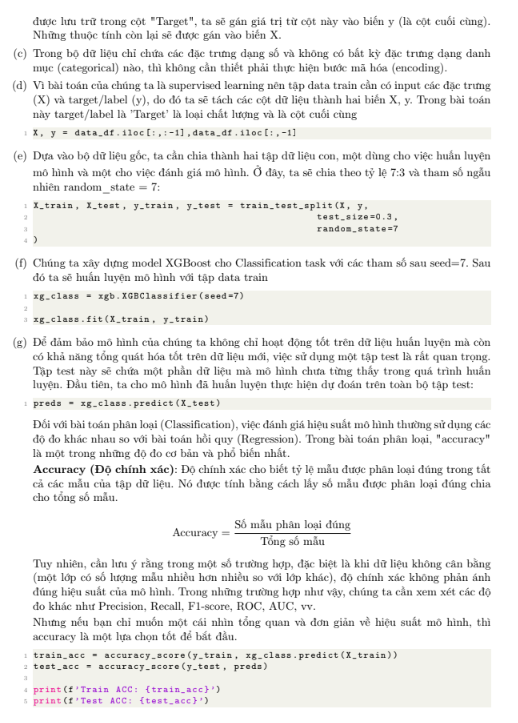
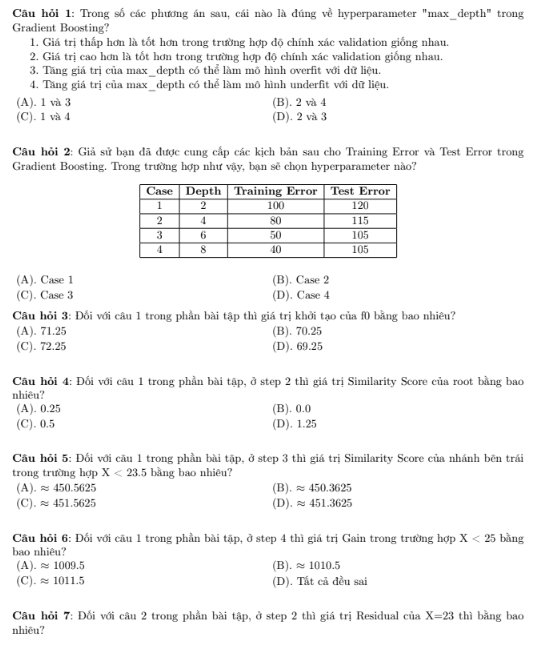
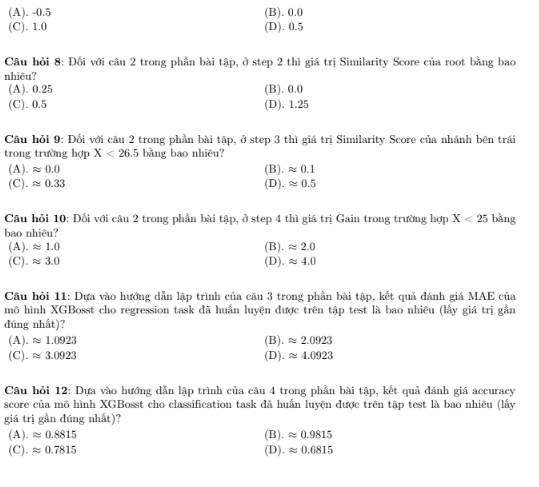

1 A, 2 C, 3 A, 4 B, 5 C, 6 C, 7 A, 8 B, 9 C, 10 D, 11 A, 12 B

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 11.8 MB/s eta 0:00:11
   - -------------------------------------- 4.7/124.9 MB 12.4 MB/s eta 0:00:10
   -- ------------------------------------- 7.3/124.9 MB 12.2 MB/s eta 0:00:10
   --- ------------------------------------ 10.0/124.9 MB 12.4 MB/s eta 0:00:10
   ---- ----------------------------------- 12.6/124.9 MB 12.3 MB/s eta 0:00:10
   ---- ----------------------------------- 15.2/124.9 MB 12.4 MB/s eta 0:00:09
   ----- ---------------------------------- 17.8/124.9 MB 12.5 MB/s eta 0:00:09
   ------ --------------------------------- 20.4/124.9 MB 12.4 MB/s eta 0:00:09
   ------- -------------------------------- 23.1/124.9 MB 12.5 MB/s eta 0:00:09
   -------- ------------------------------- 25.7/124.9 MB 12.4 MB/s eta 0:00:08
   --------- ------------------------------ 28.3/124.9 MB 12.5 MB/s eta 0:00:08
   --------- ------------------------------ 30.9/124

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [4]:
dataset_path = './content/Problem3.csv'
data_df = pd.read_csv(dataset_path)
data_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.000000
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.000000
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.000000
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.000000
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,aug,sun,4.414010,56.7,665.6,1.064711,27.8,32,2.7,False,2.006871
506,2,4,aug,sun,4.414010,56.7,665.6,1.064711,21.9,71,5.8,False,4.012592
507,7,4,aug,sun,4.414010,56.7,665.6,1.064711,21.2,70,6.7,False,2.498152
508,1,4,aug,sat,4.558079,146.0,614.7,2.509599,25.6,42,4.0,False,0.000000


In [5]:
data_df.shape

(510, 13)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       510 non-null    int64  
 1   Y       510 non-null    int64  
 2   month   510 non-null    object 
 3   day     510 non-null    object 
 4   FFMC    510 non-null    float64
 5   DMC     510 non-null    float64
 6   DC      510 non-null    float64
 7   ISI     510 non-null    float64
 8   temp    510 non-null    float64
 9   RH      510 non-null    int64  
 10  wind    510 non-null    float64
 11  rain    510 non-null    bool   
 12  area    510 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 48.4+ KB


## Dealing with categorical data

### Check categorical data

In [7]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_cols

['month', 'day', 'rain']

In [8]:
for col_name in categorical_cols:
    n_categories = data_df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


### Encode Categorical Data

In [9]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(data_df[categorical_cols])

encoded_categorical_df = pd.DataFrame(
  encoded_categorical_cols ,
  columns = categorical_cols
)

numerical_df = data_df.drop(categorical_cols , axis =1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df ] , axis =1
)

In [10]:
encoded_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,month,day,rain
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.000000,7.0,0.0,0.0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.000000,10.0,5.0,0.0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.000000,10.0,2.0,0.0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.000000,7.0,0.0,1.0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.000000,7.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,4.414010,56.7,665.6,1.064711,27.8,32,2.7,2.006871,1.0,3.0,0.0
506,2,4,4.414010,56.7,665.6,1.064711,21.9,71,5.8,4.012592,1.0,3.0,0.0
507,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,2.498152,1.0,3.0,0.0
508,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0.000000,1.0,2.0,0.0


### Train test split

In [11]:
X = encoded_df.drop(columns=['area'])
y = encoded_df['area']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [13]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_test.shape[0]}')

Number of training samples: 357
Number of val samples: 153


### Training

In [14]:
xg_reg = xgb.XGBRegressor(seed=7, learning_rate=0.01, n_estimators=102, max_depth=3)

In [15]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=102, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [16]:
preds = xg_reg.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print('Evaluation results on test set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on test set:
Mean Absolute Error: 1.1484401341167767
Mean Squared Error: 1.8845074196256495


In [18]:
preds

array([1.0842953 , 1.1191528 , 0.8486002 , 2.0224624 , 1.2788543 ,
       1.2250828 , 1.3104433 , 1.2034497 , 1.049782  , 1.1554059 ,
       1.199015  , 1.1923933 , 1.0917312 , 1.0008674 , 1.0240752 ,
       1.2901965 , 0.8638762 , 1.0937988 , 0.99773127, 1.1649472 ,
       1.1940109 , 1.3383218 , 1.0232271 , 1.2133856 , 1.1919765 ,
       1.1378535 , 1.0194002 , 1.0811108 , 1.184996  , 1.3049333 ,
       1.1830077 , 1.3067408 , 1.1667005 , 1.3425988 , 1.3937967 ,
       1.0007488 , 1.208391  , 1.2034497 , 1.0767705 , 1.2819778 ,
       1.1705064 , 1.2479149 , 0.92552763, 1.8053247 , 1.0428364 ,
       1.0156305 , 1.1495866 , 1.1290253 , 1.026823  , 1.174421  ,
       1.0199474 , 1.1087017 , 1.3341991 , 1.292637  , 1.3510199 ,
       1.0883718 , 0.9601164 , 1.2643764 , 1.117172  , 1.3104433 ,
       1.1043178 , 1.1449616 , 1.0224761 , 1.1609155 , 1.2342656 ,
       1.1611481 , 1.4087317 , 1.0568017 , 0.9867578 , 1.0175698 ,
       0.9044889 , 1.1912946 , 1.3288516 , 1.2732868 , 1.06959

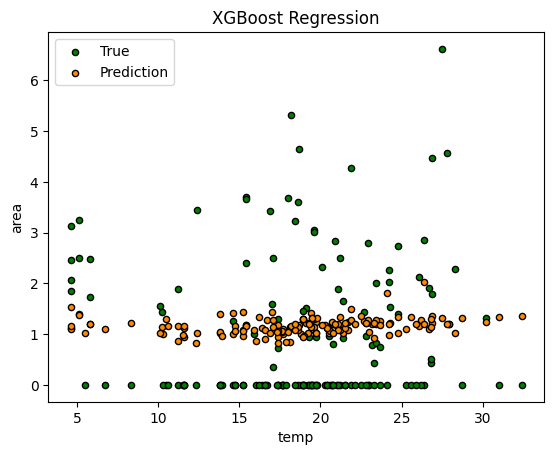

In [19]:
plt.figure()
plt.scatter(X_test['temp'], y_test, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_test['temp'], preds, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("temp")
plt.ylabel("area")
plt.title("XGBoost Regression")
plt.legend()
plt.show()

## XGBoost Classification

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [22]:
dataset_path = './content/Problem4.csv'
data_df = pd.read_csv(dataset_path)
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [23]:
data_df.shape

(178, 14)

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

### Dealing with categorical data

#### Check categorical data

In [25]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_cols

[]

In [26]:
for col_name in categorical_cols:
    n_categories = data_df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

#### Train test split

In [27]:
X, y = data_df.iloc[:,:-1],data_df.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [29]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_test.shape[0]}')

Number of training samples: 124
Number of val samples: 54


### Training

In [30]:
xg_class = xgb.XGBClassifier(seed=7)

## XGBoost with Time Series Classification

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = readucr("./content/FordA_TRAIN.tsv")
x_test, y_test = readucr("./content/FordA_TEST.tsv")

In [33]:
x_train.shape

(3601, 500)

In [34]:
y_train.shape

(3601,)

### Visualize the data

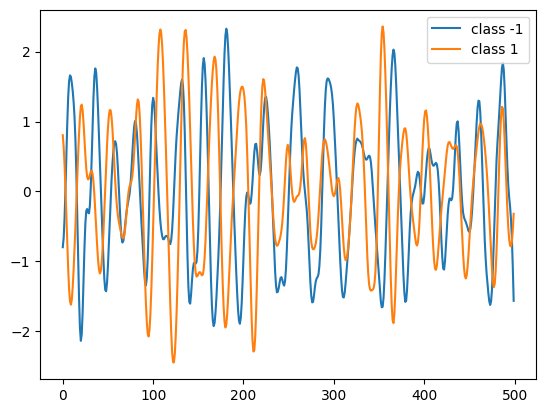

In [35]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [36]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

### XGBoost Model

In [39]:
model = XGBClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Evaluation

In [40]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,0
1,0
2,1
3,1
4,0
...,...
1315,0
1316,1
1317,1
1318,0


In [41]:
y_test = pd.DataFrame(y_test, columns=['target'])
y_test

,target
0,0
1,0
2,0
3,1
4,0
...,...
1315,0
1316,1
1317,1
1318,1


In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[550 131]
 [139 500]]


In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       681
           1       0.79      0.78      0.79       639

    accuracy                           0.80      1320
   macro avg       0.80      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320



In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


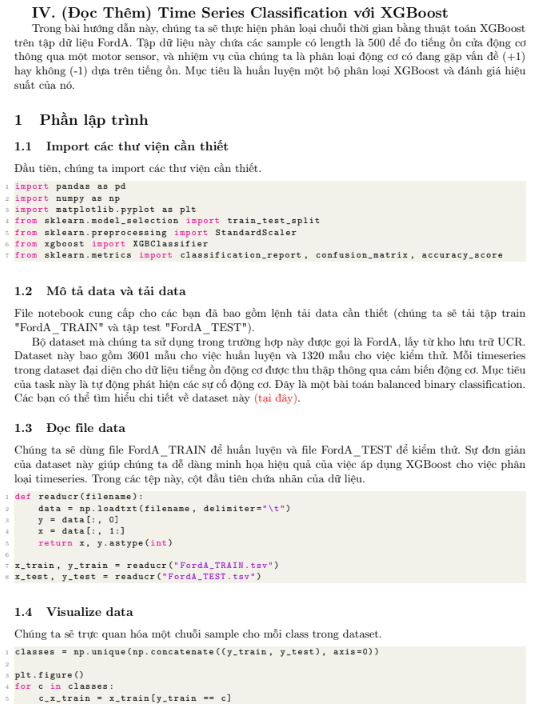
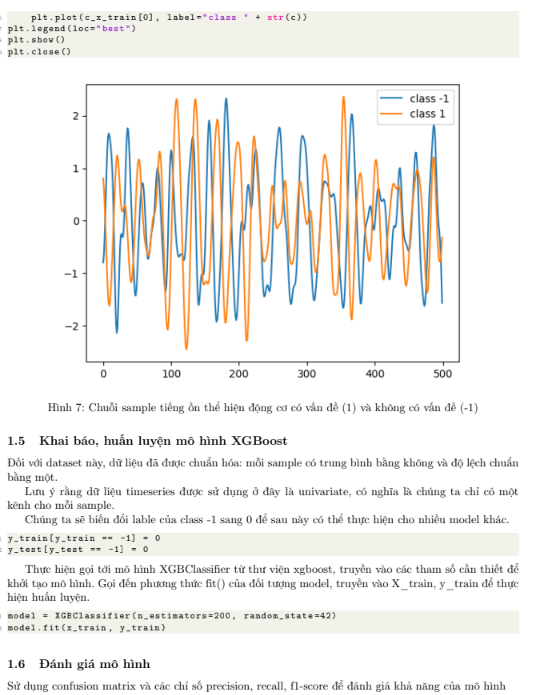
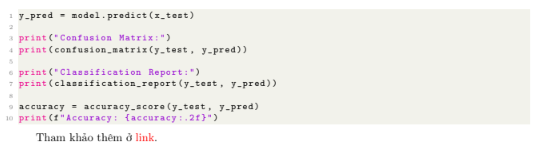